In [1]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

### The First Step | Import library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import joblib

### The Second Step | preparing Dataset

In [3]:
# Reading Dataset
url='https://raw.githubusercontent.com/wujinja-cgu/Time-Series-Analysis/main/time%20series%20data.csv'
Data = pd.read_csv(url)
Data

,DATE,No
0,10/09/2007,325
1,10/10/2007,417
2,10/11/2007,556
3,10/12/2007,467
4,10/13/2007,430
...,...,...
2991,12/17/2015,503
2992,12/18/2015,444
2993,12/19/2015,438
2994,12/20/2015,471


In [4]:
# Checking The Imported Dataset
Data.describe()

,No
count,2996.000000
mean,453.314085
std,58.424306
min,325.000000
25%,416.000000
50%,445.000000
75%,481.000000
max,902.000000


In [5]:
# Geting Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2996 non-null   object
 1   No      2996 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


In [6]:
# Creating DataFrame From Data
df = pd.DataFrame(Data)
df

,DATE,No
0,10/09/2007,325
1,10/10/2007,417
2,10/11/2007,556
3,10/12/2007,467
4,10/13/2007,430
...,...,...
2991,12/17/2015,503
2992,12/18/2015,444
2993,12/19/2015,438
2994,12/20/2015,471


In [7]:
# Removing %h-%m-%s From Date Column
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'] = df['DATE'].dt.strftime('%d-%m-%Y')
df

,DATE,No
0,09-10-2007,325
1,10-10-2007,417
2,11-10-2007,556
3,12-10-2007,467
4,13-10-2007,430
...,...,...
2991,17-12-2015,503
2992,18-12-2015,444
2993,19-12-2015,438
2994,20-12-2015,471


In [8]:
# Checking The Type Of Data Column(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2996 non-null   object
 1   No      2996 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


In [9]:
# Converting Object To Datetime
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

In [11]:
# Checking The Type Of Data Column(Datatime64) And Remove 'symbol' Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2996 non-null   datetime64[ns]
 1   No      2996 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 46.9 KB


### The Third Step | Visualization Dataset

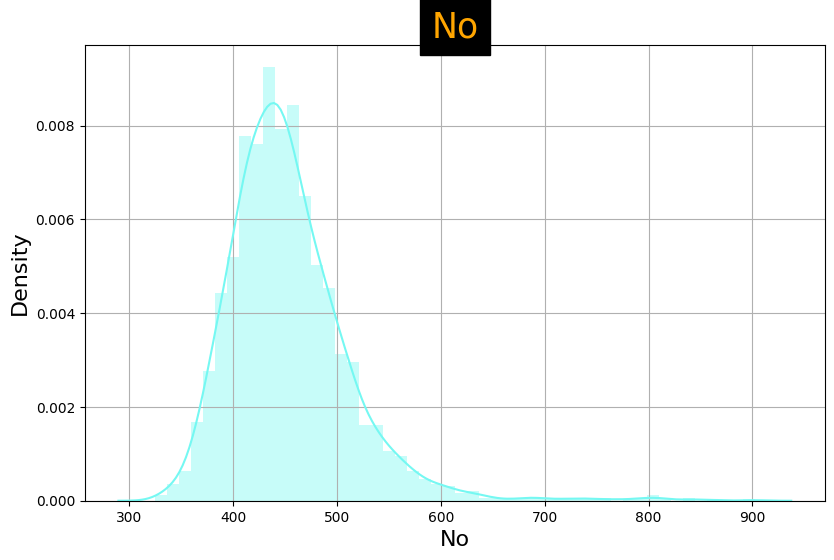

In [12]:
# Checking distribution

features = ['No']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2, idx + 1)
    sns.distplot(df, x=df[column], color='#75f8f2')
    plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()

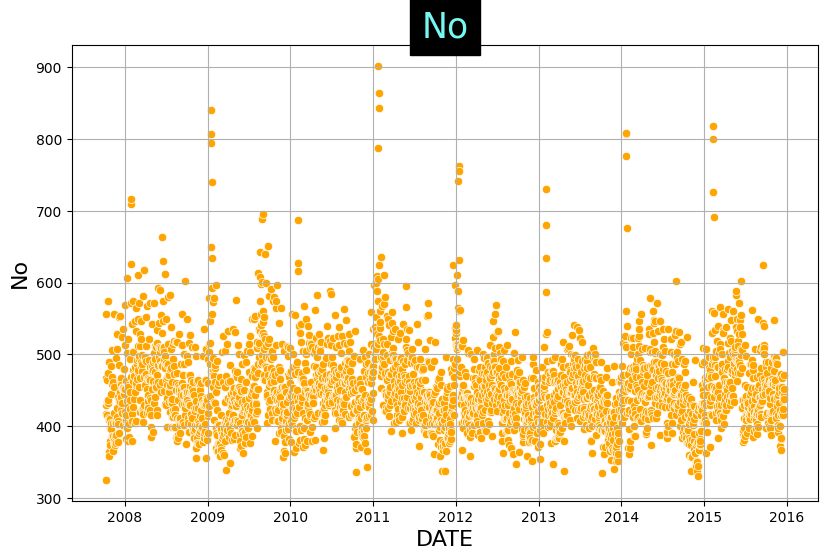

In [15]:
# checking The Behavior Of Features In Relation To 'ED arrival'
features = ['No']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =df['DATE'], y=df[column] , data = df, color='orange')
    plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('DATE', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

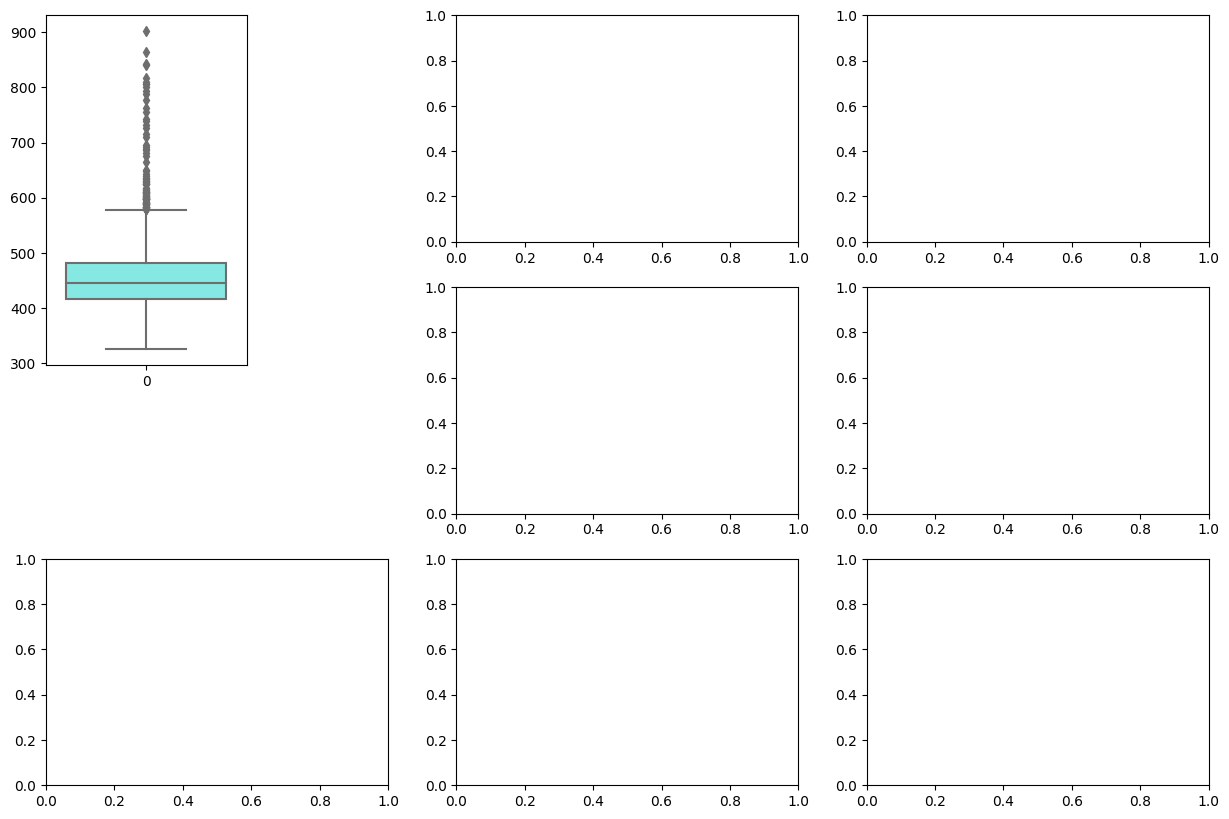

In [16]:
# Subplot
features = ['No']
fig  = plt.subplots(nrows = 3, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(2,5,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()

In [18]:
# New Style
plt.style.use("fivethirtyeight")

In [19]:
# copy from df
df1= df.copy()

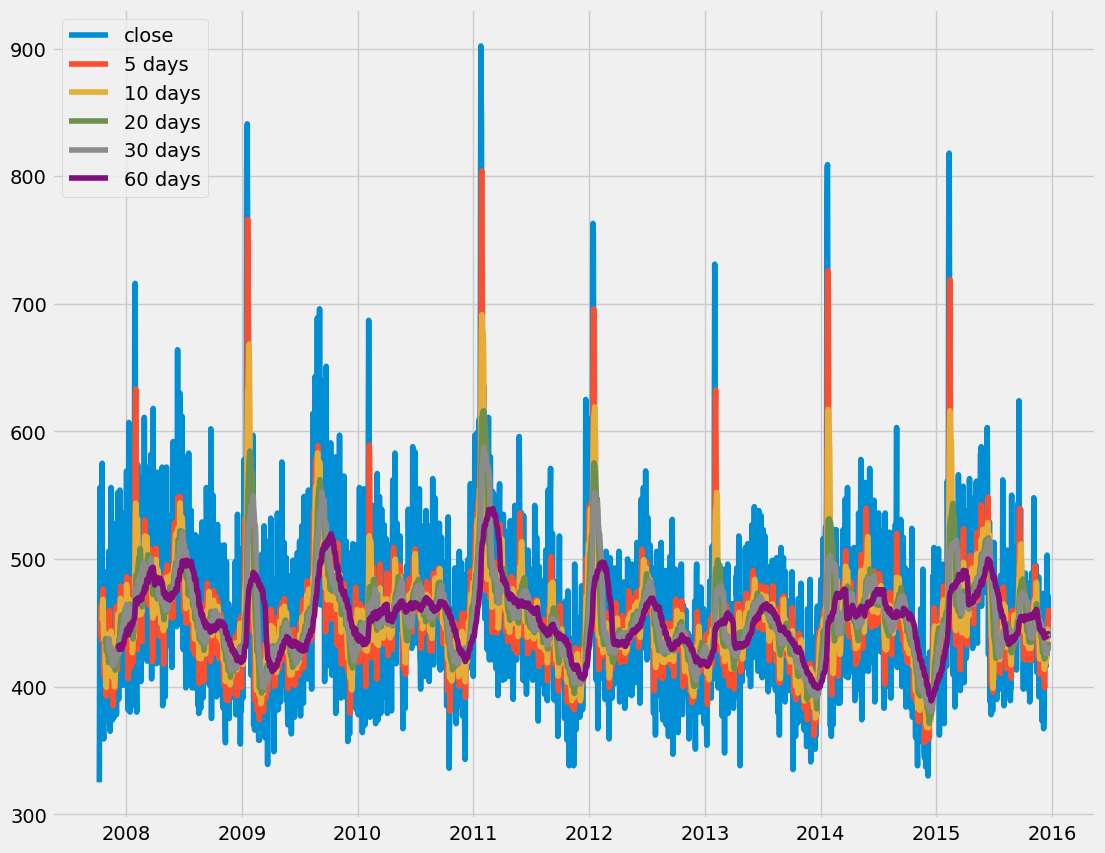

In [20]:
# Checking and choosing the best time step
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df1[column_name] = df1['No'].rolling(MA).mean()

plt.figure(figsize=(12,10))

plt.plot(df1['DATE'],df1['No'],label='close')
plt.plot(df1['DATE'],df1['MA in 5 days'],label= '5 days')
plt.plot(df1['DATE'],df1['MA in 10 days'],label= '10 days')
plt.plot(df1['DATE'],df1['MA in 20 days'],label= '20 days')
plt.plot(df1['DATE'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['DATE'],df1['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

In [21]:
# Cheking DataFram
df1

,DATE,No,MA in 5 days,MA in 10 days,MA in 20 days,MA in 30 days,MA in 60 days
0,2007-10-09,325,NaN,NaN,NaN,NaN,NaN
1,2007-10-10,417,NaN,NaN,NaN,NaN,NaN
2,2007-10-11,556,NaN,NaN,NaN,NaN,NaN
3,2007-10-12,467,NaN,NaN,NaN,NaN,NaN
4,2007-10-13,430,439.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2991,2015-12-17,503,443.8,438.9,429.65,429.200000,440.216667
2992,2015-12-18,444,445.4,445.0,429.50,429.566667,440.633333
2993,2015-12-19,438,449.8,444.0,428.75,429.900000,441.316667
2994,2015-12-20,471,456.0,444.4,431.20,429.400000,441.483333


### The Forth Step | Prepering dataset(Train, Test) to using in RNN Models

#### Normalizing

In [22]:
# Copy from df1
df2= df1.copy()

In [23]:
# Normalaze Data For Create Trin and Test with new dataframe with only the 'ED Arrival' column
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('No')
scaled = scaler.fit_transform(df2.filter(['No']))
# now have a scaled dataframe with 'No column'
df3=pd.DataFrame(scaled, columns=['No'])

In [24]:
# Get describe horizontally with '.T'
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
No,2996.0,0.222381,0.101255,0.0,0.157712,0.207972,0.270364,1.0


#### Examining the divisions of Test and Train

In [25]:
# Finding a Length of %80 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['No']).values) * .85 ))
print('Length of 85% of Dataset is ',new_dataset_length, ' Therefore, the test data length is ',len(df.No) - new_dataset_length)

Length of 85% of Dataset is  2547  Therefore, the test data length is  449


#### Creating Train and Test from the column of 'close'

In [26]:
# Create the training data set with 20 time steps
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.        , 0.15944541, 0.40034662, 0.24610052, 0.18197574,
       0.18890815, 0.18890815, 0.15771231, 0.24263432, 0.43327556,
       0.18544194, 0.25823224, 0.19237435, 0.06759099, 0.05892548,
       0.14904679, 0.28596187, 0.14384749, 0.09358752, 0.12651646])]
[0.14731369150779894]

[array([0.        , 0.15944541, 0.40034662, 0.24610052, 0.18197574,
       0.18890815, 0.18890815, 0.15771231, 0.24263432, 0.43327556,
       0.18544194, 0.25823224, 0.19237435, 0.06759099, 0.05892548,
       0.14904679, 0.28596187, 0.14384749, 0.09358752, 0.12651646]), array([0.15944541, 0.40034662, 0.24610052, 0.18197574, 0.18890815,
       0.18890815, 0.15771231, 0.24263432, 0.43327556, 0.18544194,
       0.25823224, 0.19237435, 0.06759099, 0.05892548, 0.14904679,
       0.28596187, 0.14384749, 0.09358752, 0.12651646, 0.14731369])]
[0.14731369150779894, 0.08492201039861347]



In [27]:
# Converting the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
# Reshape the X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]

In [30]:
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]

In [31]:
# Creating dataset of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])

In [32]:
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

In [33]:
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

### The fifth Step | Create Models of RNN base on LSTM, GRU, Bidirectional

#### Creating Model by LSTM

In [34]:
# Creat RNN
RNN1 = tf.keras.models.Sequential()

In [35]:
# The First LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [36]:
# The Second LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))

In [37]:
# The Connection
RNN1.add(tf.keras.layers.Dense(units=30))

In [38]:
# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))

In [39]:
# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [40]:
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 14s 80ms/step - loss: 0.0098 - accuracy: 0.0000e+00 - val_loss: 206077.6094 - val_accuracy: 0.0000e+00
Epoch 2/10
79/79 [==============================] - 4s 50ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 206074.2812 - val_accuracy: 0.0000e+00
Epoch 3/10
79/79 [==============================] - 4s 51ms/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 206076.8125 - val_accuracy: 0.0000e+00
Epoch 4/10
79/79 [==============================] - 5s 68ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 206071.9531 - val_accuracy: 0.0000e+00
Epoch 5/10
79/79 [==============================] - 4s 51ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 206069.2500 - val_accuracy: 0.0000e+00
Epoch 6/10
79/79 [==============================] - 4s 49ms/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 206069.8594 - val_accuracy: 0.0000e+00
Epoch 7/10
79/79 [==============================] - 5s 67ms/step - loss: 0.

In [41]:
# Geting The Model Predicted Price Values
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

15/15 [==============================] - 1s 18ms/step


In [42]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')

Mean Absolute Error: 29.45391104853233
Mean Squared Error: 1528.4061464632205
Root Mean Squared Error: 39.094835291419514
R2_Score: 0.5370341236471633


In [43]:
# Change of style
plt.style.use("seaborn-v0_8-muted")

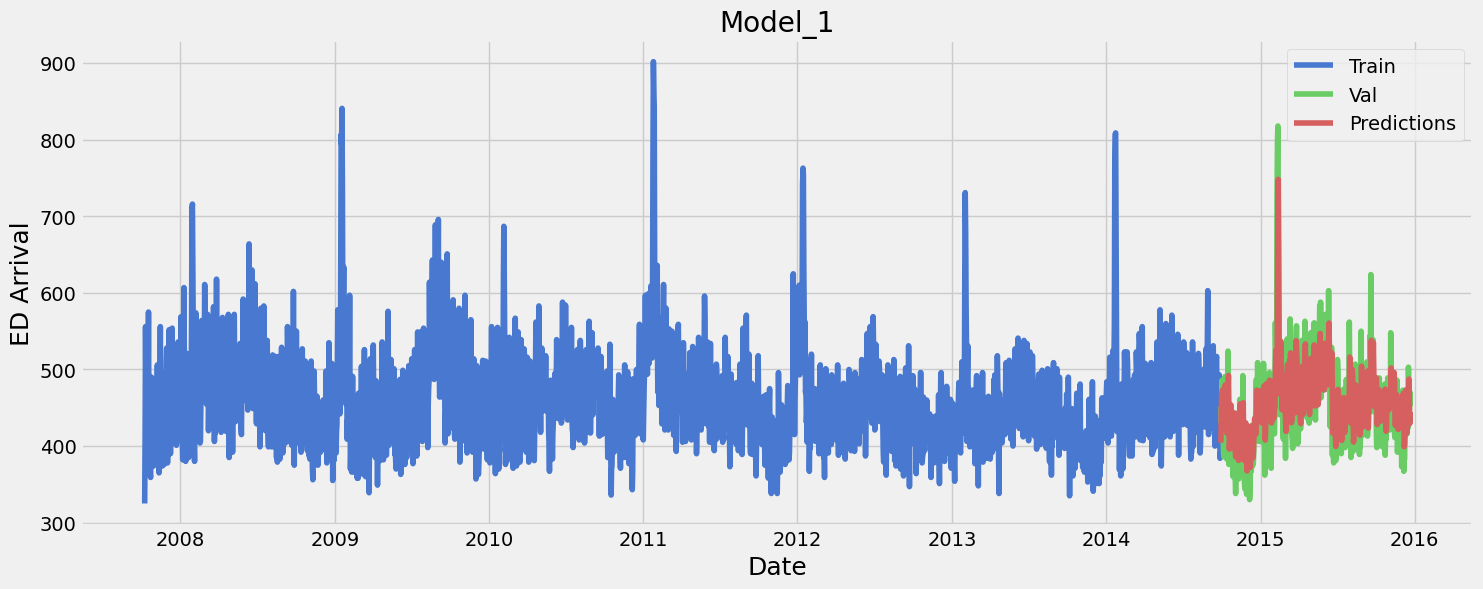

In [44]:
# Create train and val data from DataFrame
train = df2.filter(['No'])[:new_dataset_length]
valid = df2.filter(['No'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('ED Arrival', fontsize=18)
plt.plot(df1['DATE'].iloc[:2547],train['No'])
plt.plot(df1['DATE'].iloc[2547:],valid[['No', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

#### Creating Model by GRU

In [45]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()

In [46]:
# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))

In [48]:
# The Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

In [49]:
# The Connection
RNN2.add(tf.keras.layers.Dense(units=30))

In [50]:
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))

In [51]:
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [52]:
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [53]:
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 10s 55ms/step - loss: 0.0109 - accuracy: 0.0000e+00 - val_loss: 206072.1250 - val_accuracy: 0.0000e+00
Epoch 2/10
79/79 [==============================] - 5s 63ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 206072.1406 - val_accuracy: 0.0000e+00
Epoch 3/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0061 - accuracy: 3.9573e-04 - val_loss: 206081.1562 - val_accuracy: 0.0000e+00
Epoch 4/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0057 - accuracy: 3.9573e-04 - val_loss: 206064.2031 - val_accuracy: 0.0000e+00
Epoch 5/10
79/79 [==============================] - 4s 56ms/step - loss: 0.0053 - accuracy: 3.9573e-04 - val_loss: 206056.0469 - val_accuracy: 0.0000e+00
Epoch 6/10
79/79 [==============================] - 4s 50ms/step - loss: 0.0053 - accuracy: 3.9573e-04 - val_loss: 206074.6562 - val_accuracy: 0.0000e+00
Epoch 7/10
79/79 [==============================] - 3s 44ms/step - loss: 0.

In [54]:
# Geting The Model Predicted Price Values
predictions2 = RNN2.predict(X_test)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

15/15 [==============================] - 2s 31ms/step


In [55]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')

Mean Absolute Error: 29.05956976875696
Mean Squared Error: 1470.7813461736002
Root Mean Squared Error: 38.35076721753556
R2_Score: 0.5544891150625508


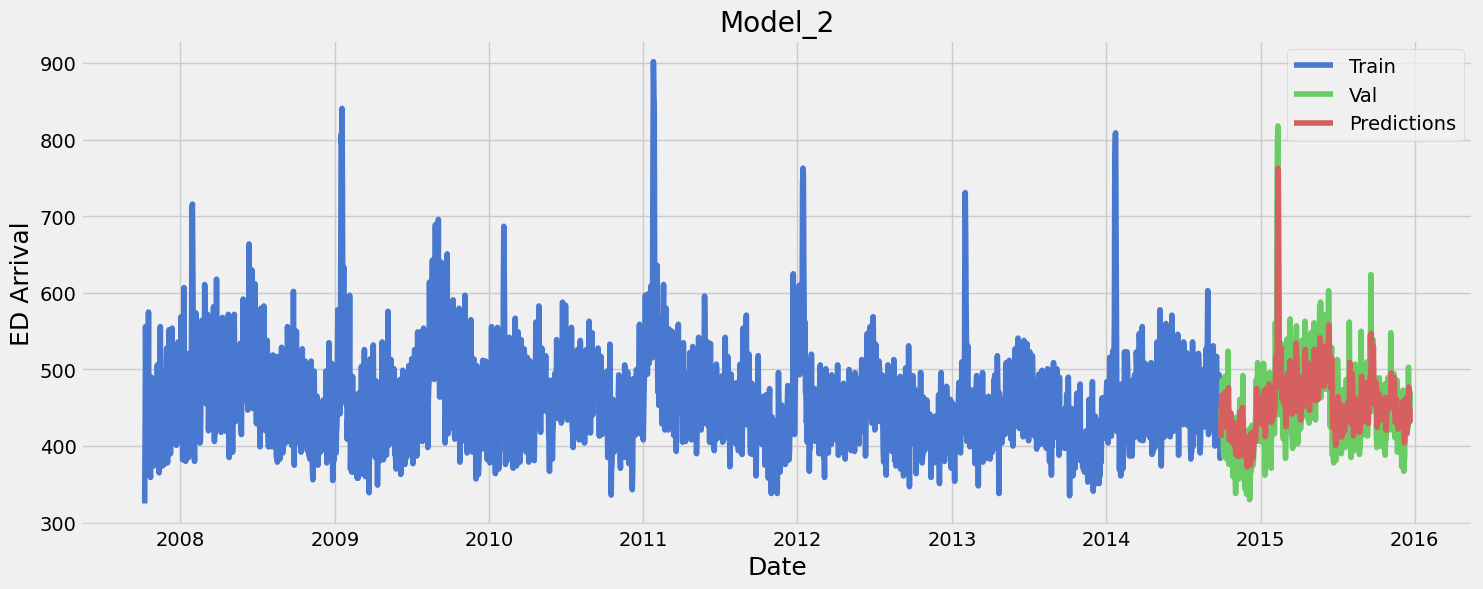

In [56]:
# Create train and val data from DataFrame
train = df2.filter(['No'])[:new_dataset_length]
valid = df2.filter(['No'])[new_dataset_length:]
valid['Predictions2'] = predictions2

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2')
plt.xlabel('Date', fontsize=18)
plt.ylabel('ED Arrival', fontsize=18)
plt.plot(df1['DATE'].iloc[:2547],train['No'])
plt.plot(df1['DATE'].iloc[2547:],valid[['No', 'Predictions2']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

#### Creating Model by LSTM & Bidirectional

In [57]:
# Creat RNN
RNN3 = tf.keras.models.Sequential()

In [58]:
# The First Bidirectional & LSTM  Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1))))

In [59]:
# The Second Bidirectional & LSTM Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=65, return_sequences=False)))

In [60]:
# The Connection
RNN3.add(tf.keras.layers.Dense(units=30))

In [61]:
# The Output layer
RNN3.add(tf.keras.layers.Dense(units=1))

In [62]:
# Compiling The RNN
RNN3.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [63]:
# Fitting Model on The Train and Validation Dataset
Model_3 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 4s 54ms/step - loss: 0.0046 - accuracy: 3.9573e-04 - val_loss: 206061.2344 - val_accuracy: 0.0000e+00
Epoch 2/10
79/79 [==============================] - 5s 58ms/step - loss: 0.0046 - accuracy: 3.9573e-04 - val_loss: 206058.7188 - val_accuracy: 0.0000e+00
Epoch 3/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0044 - accuracy: 3.9573e-04 - val_loss: 206068.6562 - val_accuracy: 0.0000e+00
Epoch 4/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0044 - accuracy: 3.9573e-04 - val_loss: 206079.6094 - val_accuracy: 0.0000e+00
Epoch 5/10
79/79 [==============================] - 3s 44ms/step - loss: 0.0043 - accuracy: 3.9573e-04 - val_loss: 206070.9375 - val_accuracy: 0.0000e+00
Epoch 6/10
79/79 [==============================] - 5s 61ms/step - loss: 0.0044 - accuracy: 3.9573e-04 - val_loss: 206082.8125 - val_accuracy: 0.0000e+00
Epoch 7/10
79/79 [==============================] - 4s 44ms/step - loss: 0.0

In [64]:
# Geting The Models Predicted Price Values
predictions3 = RNN3.predict(X_test)
# Converting scaled number to actual number
predictions3 = scaler.inverse_transform(predictions3)

15/15 [==============================] - 6s 64ms/step


In [65]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')

Mean Absolute Error: 129.73745849881246
Mean Squared Error: 20196.654323727125
Root Mean Squared Error: 142.11493350006228
R2_Score: -5.11772060065099


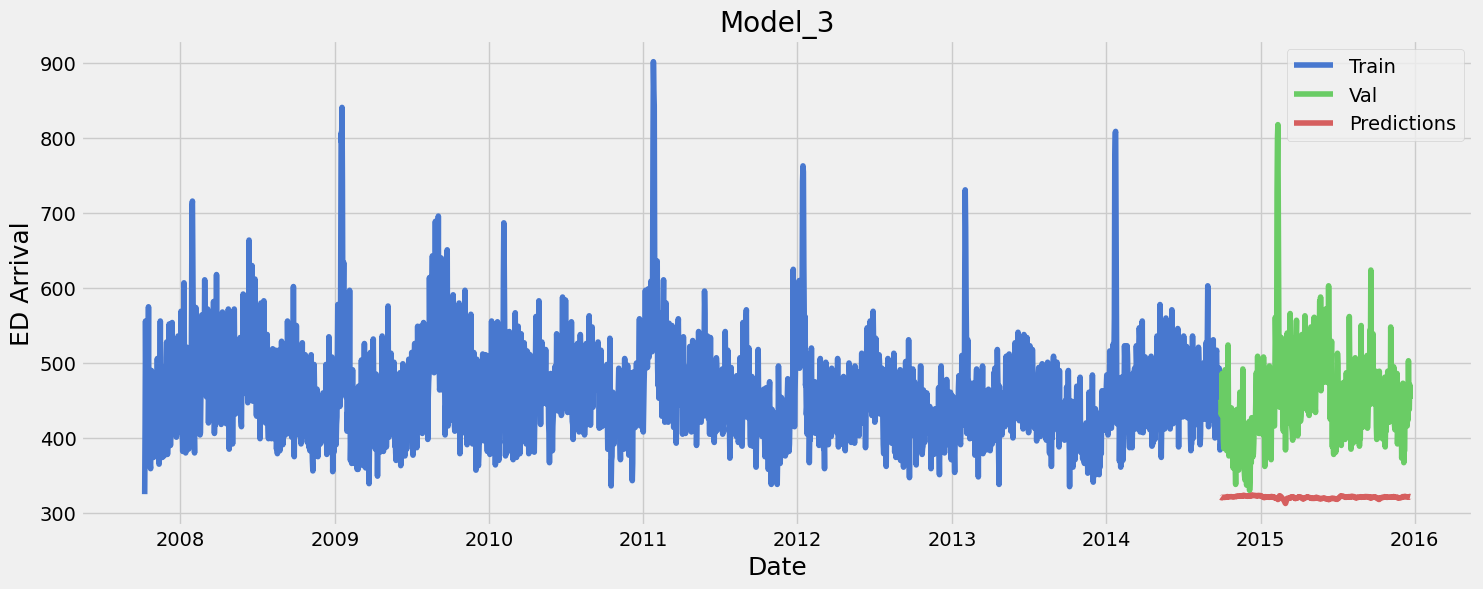

In [66]:
# Create train and val data from DataFrame
train = df2.filter(['No'])[:new_dataset_length]
valid = df2.filter(['No'])[new_dataset_length:]
valid['Predictions3'] = predictions3

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('ED Arrival', fontsize=18)
plt.plot(df1['DATE'].iloc[:2547],train['No'])
plt.plot(df1['DATE'].iloc[2547:],valid[['No', 'Predictions3']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

#### Creating Model by LSTM & GRU

In [67]:
# Creat RNN
RNN4 = tf.keras.models.Sequential()

In [68]:
# The First Layer of LSTM
RNN4.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [69]:
# The Second Layer of GRU
RNN4.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

In [70]:
# The Connection
RNN4.add(tf.keras.layers.Dense(units=30))

In [71]:
# The Output layer
RNN4.add(tf.keras.layers.Dense(units=1))

In [72]:
# Compiling The RNN
RNN4.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [73]:
# Fitting Model on The Train and Validation Dataset
Model_4 = RNN4.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 12s 82ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 206069.8906 - val_accuracy: 0.0000e+00
Epoch 2/10
79/79 [==============================] - 4s 51ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 206085.1250 - val_accuracy: 0.0000e+00
Epoch 3/10
79/79 [==============================] - 4s 57ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 206055.7344 - val_accuracy: 0.0000e+00
Epoch 4/10
79/79 [==============================] - 5s 61ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 206072.9219 - val_accuracy: 0.0000e+00
Epoch 5/10
79/79 [==============================] - 4s 50ms/step - loss: 0.0062 - accuracy: 3.9573e-04 - val_loss: 206082.9531 - val_accuracy: 0.0000e+00
Epoch 6/10
79/79 [==============================] - 5s 60ms/step - loss: 0.0057 - accuracy: 3.9573e-04 - val_loss: 206063.8281 - val_accuracy: 0.0000e+00
Epoch 7/10
79/79 [==============================] - 5s 59ms/step - loss: 0.

In [74]:
# Geting The Models Predicted Price Values
predictions4 = RNN4.predict(X_test)
# Converting scaled number to actual number
predictions4 = scaler.inverse_transform(predictions4)

15/15 [==============================] - 2s 27ms/step


In [75]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions4)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions4)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions4))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions4)}')

Mean Absolute Error: 28.374715486454274
Mean Squared Error: 1525.568841790241
Root Mean Squared Error: 39.05853097327447
R2_Score: 0.5378935648679706


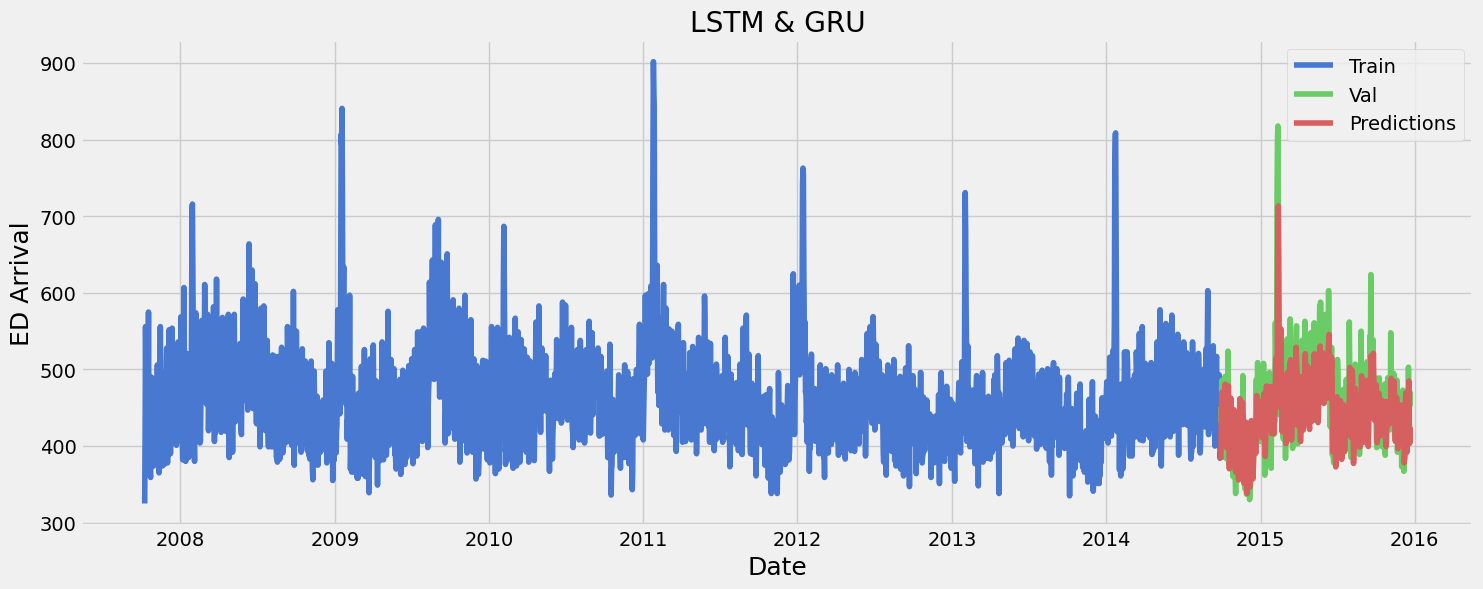

In [78]:
# Create train and val data from DataFrame
train = df2.filter(['No'])[:new_dataset_length]
valid = df2.filter(['No'])[new_dataset_length:]
valid['Predictions4'] = predictions4

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('LSTM & GRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('ED Arrival', fontsize=18)
plt.plot(df1['DATE'].iloc[:2547],train['No'])
plt.plot(df1['DATE'].iloc[2547:],valid[['No', 'Predictions4']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

In [77]:
# Save all of Models for WebApp or other predictions
joblib.dump(Model_1, 'model1')
joblib.dump(Model_2, 'model2') # The best model
joblib.dump(Model_4, 'model4')

['model4']